In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/linneajensen/Dropbox/ITU/Thesis/Data/eurovision_master.csv')

df_2016 = pd.read_csv('/Users/linneajensen/Dropbox/ITU/Thesis/Data/eurovision_points_2016_2022.csv')


In [24]:
df

,Unnamed: 0,Unnamed: 0.1,year,Artist,from_country,to_country,points,total_points,rank,from_code2,...,prop_emigrants_v2p,migration_p2v,population_v,prop_emigrants_p2v,migration_pop_year,comps_without_win,has_border,televote_points,jury_points,mean_points
0,0,0,1998,Danijela,belgium,croatia,5.0,131,5,BE,...,0.000044,72.0,10136811.0,0.000007,1995.0,42,False,0.0,0.0,0.0
1,1,1,1998,Michael Hajiyanni,belgium,cyprus,2.0,37,11,BE,...,0.000107,77.0,10136811.0,0.000008,1995.0,42,False,0.0,0.0,0.0
2,6,6,1998,Guildo Horn feat. Die Orthopädischen Strümpfe,belgium,germany,7.0,86,7,BE,...,0.000273,65226.0,10136811.0,0.006435,1995.0,15,True,0.0,0.0,0.0
3,10,10,1998,Dana International,belgium,israel,10.0,172,1,BE,...,0.000774,4018.0,10136811.0,0.000396,1995.0,18,False,0.0,0.0,0.0
4,11,11,1998,Chiara,belgium,malta,8.0,165,3,BE,...,0.000061,258.0,10136811.0,0.000025,1995.0,42,False,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,21305,21305,2022,Konstrakta,united kingdom,serbia,1.0,169,5,GB,...,0.000095,9343.0,67081000.0,0.000139,2020.0,13,False,1.0,1.0,1.0
8716,21306,21306,2022,Chanel,united kingdom,spain,5.0,282,3,GB,...,0.006401,150892.0,67081000.0,0.002249,2020.0,51,False,5.0,10.0,7.5
8717,21307,21307,2022,Cornelia Jakobs,united kingdom,sweden,4.0,245,4,GB,...,0.002870,35824.0,67081000.0,0.000534,2020.0,5,False,4.0,12.0,8.0
8718,21309,21309,2022,Kalush Orchestra,united kingdom,ukraine,12.0,379,1,GB,...,0.000000,22119.0,67081000.0,0.000330,2020.0,4,False,12.0,0.0,12.0


<AxesSubplot:>

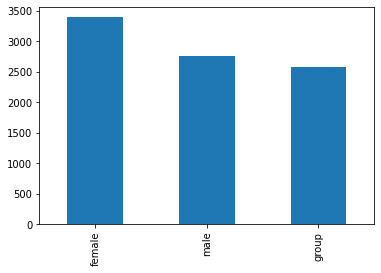

In [4]:
#simple plot of gender distribution
pd.value_counts(df['gender']).plot.bar()

In [5]:
#Group year and country, and get count of gender.
performer_df = df[['year','to_country','gender']]
performer_df1=performer_df.groupby(['year','to_country','gender']).size().reset_index()
performer_df2=performer_df1.groupby(['year','gender']).size().reset_index()

#pivot table to be able to plot
pivoted = performer_df2.pivot(index="year", columns="gender").reset_index()

pivoted

year      0           
gender       female group male
0       1998     11     5    8
1       1999     11     9    3
2       2000      8    10    6
3       2001      6     8    9
4       2002     14     7    3
5       2003     13     6    6
6       2004      7     6   11
7       2005      9    11    4
8       2006      9     7    8
9       2007      8    10    6
10      2008     10     8    7
11      2009     13     8    4
12      2010      9     8    8
13      2011     10     9    6
14      2012     12     5    9
15      2013     11     5   10
16      2014      8    10    8
17      2015     10     8    7
18      2016     13     3    9
19      2017      9     5   11
20      2018      8     8   10
21      2019      9     4   12
22      2021     11     8    3
23      2022      8     8    8

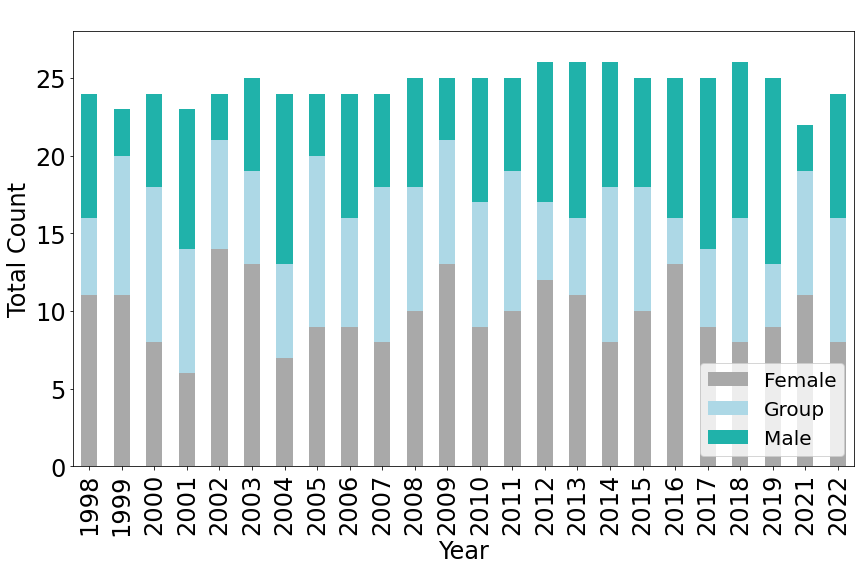

In [12]:
#Plotting gender distribution
ax = pivoted.plot.bar(x='year', stacked=True, color=['darkgrey','lightblue','lightseagreen'], figsize=(14,8))
ax.set_title(' ', fontsize=24)
plt.ylabel("Total Count")
plt.xlabel("Year")
plt.legend(["Female", "Group","Male"],loc='lower right',fontsize = 20)
ax.set_ylim(0,28)
#ax.set_xticklabels(['A','B','C'], rotation=0)
plt.savefig('plots/plot_gender_distribution.pdf', bbox_inches='tight')
#bbox_to_anchor=(1.0, 1.0)

<AxesSubplot:>

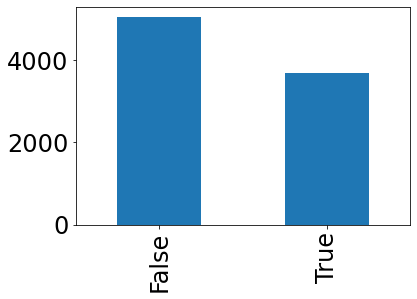

In [14]:
#simple plot How many sing in own language
pd.value_counts(df['Contains_Own_Language']).plot.bar()

In [15]:
#Group year and country, and get count of voting lang.
language_df = df[['year','to_country','Contains_Own_Language']]
language_df=language_df.groupby(['year','to_country','Contains_Own_Language']).size().reset_index()
language_df=language_df.groupby(['year','Contains_Own_Language']).size().reset_index()

#pivot table to be able to plot
lang_pivoted = language_df.pivot(index="year", columns="Contains_Own_Language").reset_index()

lang_pivoted

year     0      
Contains_Own_Language       False  True
0                      1998   NaN  24.0
1                      1999   9.0  14.0
2                      2000  11.0  13.0
3                      2001  11.0  12.0
4                      2002  13.0  11.0
5                      2003  15.0  10.0
6                      2004  16.0   8.0
7                      2005  12.0  12.0
8                      2006  13.0  11.0
9                      2007   9.0  15.0
10                     2008  12.0  13.0
11                     2009  12.0  13.0
12                     2010  17.0   8.0
13                     2011  15.0  10.0
14                     2012  14.0  12.0
15                     2013  16.0  10.0
16                     2014  18.0   8.0
17                     2015  18.0   7.0
18                     2016  19.0   6.0
19                     2017  17.0   8.0
20                     2018  13.0  13.0
21                     2019  14.0  11.0
22                     2021  12.0  10.0
23                     2022  13.0  11.0

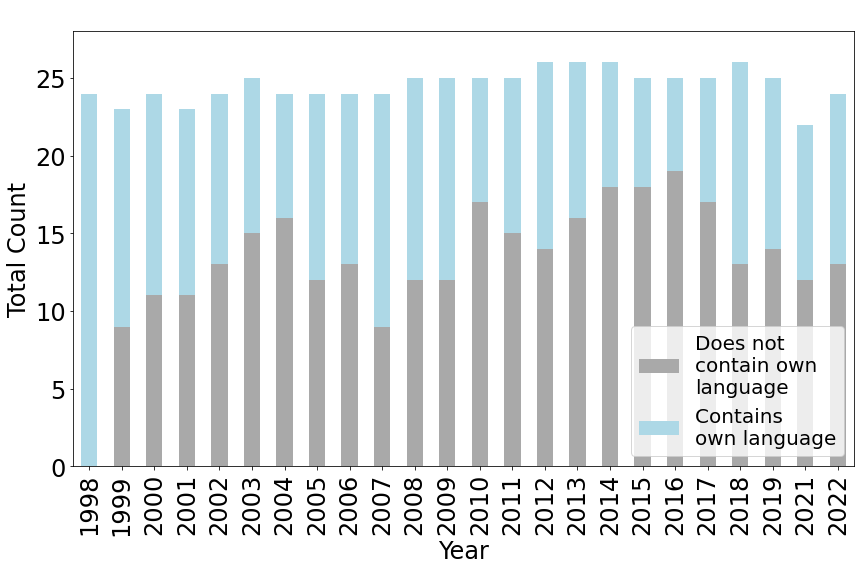

In [17]:
#Plotting lang distribution
ax = lang_pivoted.plot.bar(x='year', stacked=True, color=['darkgrey','lightblue','lightseagreen'], figsize=(14,8))
ax.set_title(' ', fontsize=24)
plt.ylabel("Total Count")
plt.xlabel("Year")
plt.legend(["Does not \ncontain own \nlanguage","Contains \nown language"], loc='lower right',fontsize = 20)
ax.set_ylim(0,28)
#ax.set_xticklabels(['A','B','C'], rotation=0)
plt.savefig('plots/plot_language_distribution.pdf', bbox_inches='tight')


In [26]:
#Group year and country, and get count of loosing years.
migration_df = df[['year','from_country','to_country','prop_emigrants_v2p','prop_emigrants_p2v']]
#migration_df=migration_df.groupby(['year','from_country','to_country','prop_emigrants_v2p','prop_emigrants_p2v']).min().reset_index()
#loosing_df=loosing_df.groupby(['year','to_country']).size().reset_index()

#pivot table to be able to plot
#loosing_pivoted = loosing_df.pivot(index="year", columns="to_country").reset_index()

migration_df


,year,from_country,to_country,prop_emigrants_v2p,prop_emigrants_p2v
0,1998,belgium,croatia,0.000044,0.000007
1,1998,belgium,cyprus,0.000107,0.000008
2,1998,belgium,germany,0.000273,0.006435
3,1998,belgium,israel,0.000774,0.000396
4,1998,belgium,malta,0.000061,0.000025
...,...,...,...,...,...
8715,2022,united kingdom,romania,0.001640,0.005867
8716,2022,united kingdom,serbia,0.000095,0.000139
8717,2022,united kingdom,spain,0.006401,0.002249
8718,2022,united kingdom,sweden,0.002870,0.000534


In [28]:
migration_df_2022 = migration_df[migration_df['year'] == 2022]
migration_df_2022

,year,from_country,to_country,prop_emigrants_v2p,prop_emigrants_p2v
8320,2022,albania,estonia,0.000031,0.000000
8321,2022,albania,finland,0.000128,0.000000
8322,2022,albania,greece,0.041745,0.010446
8323,2022,albania,italy,0.008180,0.002940
8324,2022,albania,moldova,0.000000,0.000000
...,...,...,...,...,...
8715,2022,united kingdom,romania,0.001640,0.005867
8716,2022,united kingdom,serbia,0.000095,0.000139
8717,2022,united kingdom,spain,0.006401,0.002249
8718,2022,united kingdom,sweden,0.002870,0.000534


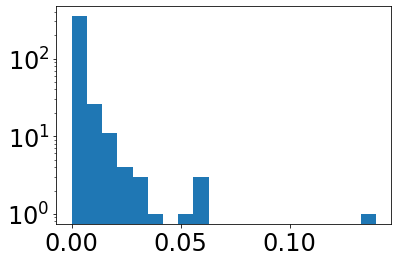

In [44]:
#Migration hist plotting
plt.figure()
plt.hist(migration_df_2022['prop_emigrants_p2v'],bins=20)
plt.yscale('log')
#plt.xscale('log')
plt.show()

In [45]:
test = migration_df_2022[migration_df_2022['prop_emigrants_p2v'] >= 0.1]
test

,year,from_country,to_country,prop_emigrants_v2p,prop_emigrants_p2v
8641,2022,san marino,italy,0.000032,0.139648


In [8]:
plt.rcParams.update({'font.size': 24}) 


In [25]:
pd.set_option('display.max_columns', None)